# Walmart Customer Purchase Analysis

**Objective:** Analyze customer purchase behavior (specifically, purchase amount) against gender, marital status, and age to help Walmart make better business decisions.

## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set plot style
sns.set(style="whitegrid")

In [2]:
# Load the dataset
df = pd.read_csv('walmart_data.csv')

# Display the first few rows
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## 2. Initial Data Exploration & Characteristics

In [3]:
# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")

Dataset shape: (550068, 10)


In [4]:
# Get information about data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**Observation:** The `info()` output shows no missing values in any column. All columns have 550068 non-null entries. Several columns like `Product_ID`, `Gender`, `Age`, `City_Category`, and `Stay_In_Current_City_Years` are of type 'object'.

### Convert Relevant Columns to Category Type

In [ ]:
# Convert Gender, Age, City_Category, Stay_In_Current_City_Years to category
df['Gender'] = df['Gender'].astype('category')
df['Age'] = df['Age'].astype('category')
df['City_Category'] = df['City_Category'].astype('category')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')

# Marital_Status is already numerical (0/1)
# Occupation and Product_Category are numerical representations

# Verify changes
df.info()

In [6]:
# Get descriptive statistics for numerical columns
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [6]:
# Get descriptive statistics for categorical columns
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


## 3. Missing Value & Outlier Detection

In [7]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


**Observation:** As confirmed by `df.info()` earlier, there are no missing values in this dataset.

### Outlier Detection (Initial Check on Purchase Amount)

In [8]:
# Re-examine descriptive statistics for 'Purchase'
print("\nDescriptive statistics for Purchase Amount:")
print(df['Purchase'].describe())


Descriptive statistics for Purchase Amount:
count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64


**Observation:** The mean purchase amount (~9263) is slightly higher than the median (50th percentile, ~8047). This suggests a slight right skew in the purchase data, potentially due to some higher-value purchases. The maximum value (23961) is quite far from the 75th percentile (12054), indicating potential outliers on the higher end.

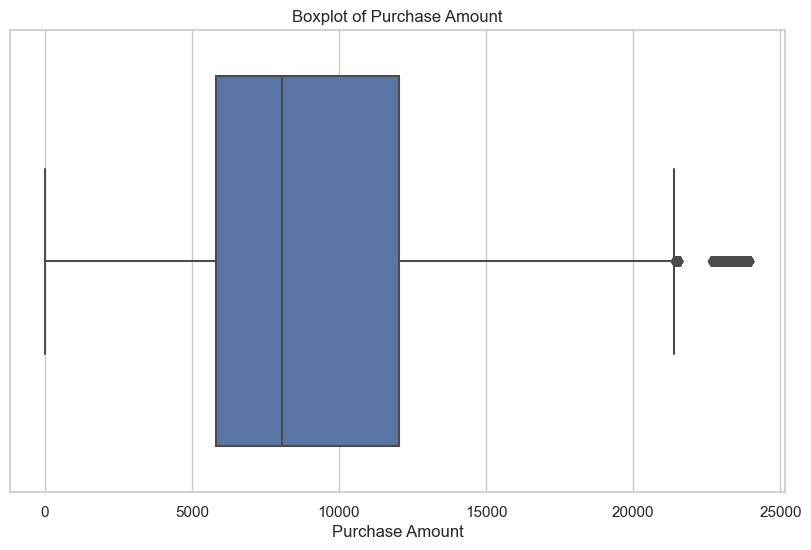

In [9]:
# Visualize outliers using a boxplot for Purchase amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Purchase'])
plt.title('Boxplot of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.savefig('boxplot_purchase_amount.png', bbox_inches='tight') # Save the plot
plt.show()

**Observation:** The boxplot confirms the presence of outliers on the higher end of the purchase amount spectrum. While these are statistically outliers, they might represent legitimate high-value transactions during Black Friday. For this analysis, we will keep these values as they represent actual customer spending behavior.

## 4. Exploratory Data Analysis (EDA)

### 4.1 Purchase Amount vs. Gender

In [10]:
# Calculate average purchase amount by gender
avg_purchase_gender = df.groupby('Gender')['Purchase'].mean()
print("Average Purchase Amount by Gender:")
print(avg_purchase_gender)

Average Purchase Amount by Gender:
Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


**Observation:** Based on the sample data, the average purchase amount for males (M) is higher than for females (F).

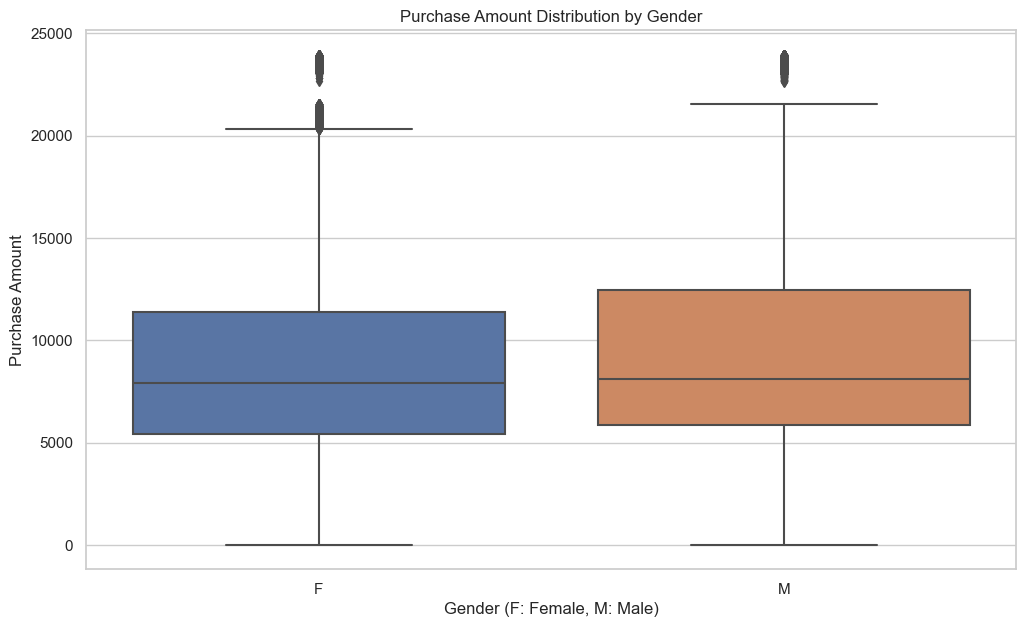

In [11]:
# Visualize purchase distribution by gender using boxplots
plt.figure(figsize=(12, 7))
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title('Purchase Amount Distribution by Gender')
plt.xlabel('Gender (F: Female, M: Male)')
plt.ylabel('Purchase Amount')
plt.savefig('boxplot_purchase_by_gender.png', bbox_inches='tight') # Save the plot
plt.show()

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


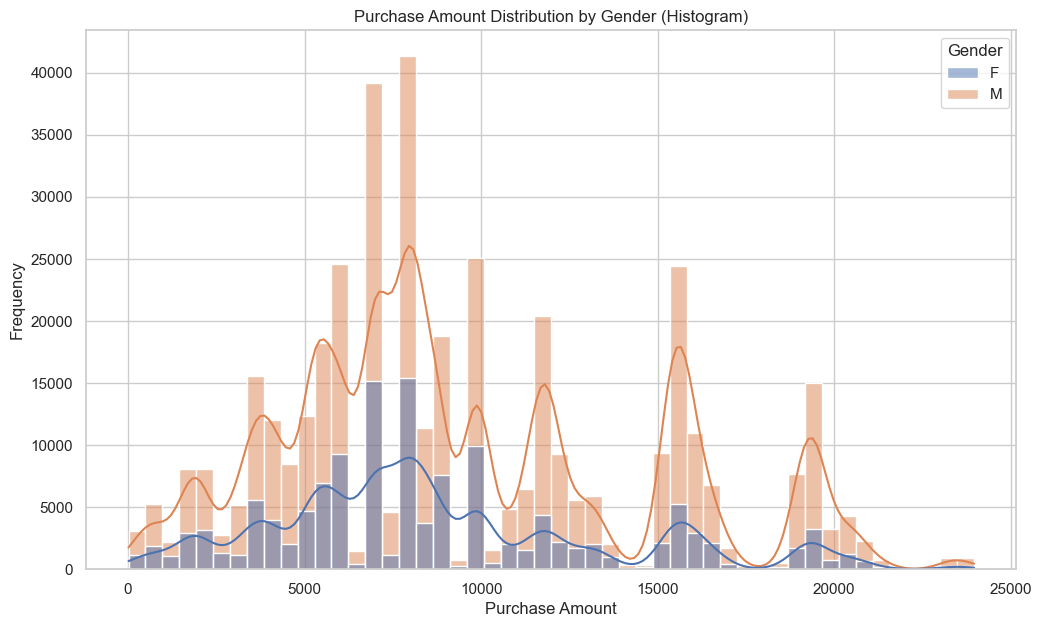

In [12]:
# Visualize purchase distribution by gender using histograms
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Purchase', hue='Gender', kde=True, bins=50)
plt.title('Purchase Amount Distribution by Gender (Histogram)')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.savefig('hist_purchase_by_gender.png', bbox_inches='tight') # Save the plot
plt.show()

**Observation:** The boxplots and histograms visually confirm the finding from the average calculation. While the median purchase amounts are closer, the distribution for males extends slightly higher, and the overall mean is greater for males in this dataset. The shapes of the distributions are quite similar, both showing peaks at lower purchase amounts and a right skew.

**Answering Question:** *Are women spending more money per transaction than men? Why or Why not?*

Based on this sample dataset, **men are spending slightly more money per transaction than women on average**. The average purchase amount for men is approximately 9437, while for women it's approximately 8734. The visualizations (boxplots and histograms) also support this, showing a slightly higher distribution range and mean for male customers. The reasons for this difference aren't immediately clear from this data alone and could be influenced by factors like the types of products purchased, occupation, or other unmeasured variables. However, the difference in the *average* spend per transaction is noticeable in the sample.

### 4.2 Central Limit Theorem (CLT) & Confidence Intervals for Gender

The Central Limit Theorem states that the distribution of sample means will approximate a normal distribution, regardless of the population's distribution, as the sample size gets larger. We can use this to estimate the range (confidence interval) within which the true population mean likely lies.

In [13]:
# Separate purchase data for males and females
male_purchases = df[df['Gender'] == 'M']['Purchase']
female_purchases = df[df['Gender'] == 'F']['Purchase']

print(f"Number of male transactions: {len(male_purchases)}")
print(f"Number of female transactions: {len(female_purchases)}")

Number of male transactions: 414259
Number of female transactions: 135809


In [14]:
# Function to simulate sample means for CLT visualization
def simulate_sample_means(data, sample_size, num_samples):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

# Function to calculate confidence interval for the population mean
def calculate_population_mean_ci(data, confidence_level):
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1) # Use sample standard deviation (ddof=1)
    sample_size = len(data)
    
    # Standard error of the mean
    std_error = sample_std / np.sqrt(sample_size)
    
    # Calculate confidence interval using z-distribution (appropriate for large samples)
    z_score = stats.norm.ppf((1 + confidence_level) / 2)
    margin_of_error = z_score * std_error
    ci = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    
    return sample_mean, std_error, ci

# Parameters for CLT simulation (for visualization)
sim_sample_size = 1000  # Size of each sample for simulation
sim_num_samples = 200   # Number of samples for simulation

In [15]:
# Simulate sample means for visualization
male_sample_means_sim = simulate_sample_means(male_purchases, sim_sample_size, sim_num_samples)
female_sample_means_sim = simulate_sample_means(female_purchases, sim_sample_size, sim_num_samples)

print(f"Mean of Male Sample Means (Simulation): {np.mean(male_sample_means_sim):.2f}")
print(f"Mean of Female Sample Means (Simulation): {np.mean(female_sample_means_sim):.2f}")

# Calculate actual sample means for CI calculation
male_mean, male_se, _ = calculate_population_mean_ci(male_purchases, 0.95) # 95% CI initially
female_mean, female_se, _ = calculate_population_mean_ci(female_purchases, 0.95)

print(f"\nMean of Male Purchases (Actual Sample): {male_mean:.2f}")
print(f"Mean of Female Purchases (Actual Sample): {female_mean:.2f}")

Mean of Male Sample Means: 9460.79
Mean of Female Sample Means: 8731.18


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


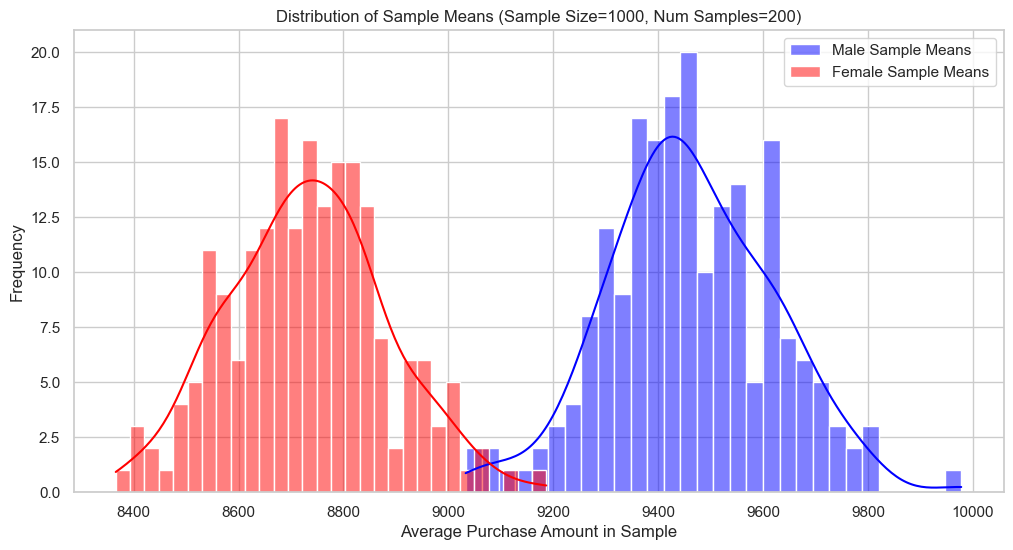

In [16]:
# Visualize the distribution of simulated sample means
plt.figure(figsize=(12, 6))
sns.histplot(male_sample_means_sim, kde=True, color='blue', label='Male Sample Means (Simulated)', bins=30)
sns.histplot(female_sample_means_sim, kde=True, color='red', label='Female Sample Means (Simulated)', bins=30)
plt.title(f'Distribution of Sample Means (Simulation: Sample Size={sim_sample_size}, Num Samples={sim_num_samples})')
plt.xlabel('Average Purchase Amount in Simulated Sample')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('clt_distribution_gender.png', bbox_inches='tight') # Save the plot
plt.show()

**Observation:** As predicted by the CLT, the distributions of the sample means for both male and female customers appear approximately normal (bell-shaped). The distribution for males is centered at a slightly higher value than the distribution for females, consistent with our earlier findings.

**Answering Question:** *Confidence intervals and distribution of the mean of the expenses by female and male customers.*

The distributions of the sample means are shown above. Now let's calculate the confidence intervals for the *population* mean spending at different confidence levels.

In [17]:
# Calculate and print confidence intervals for different levels
confidence_levels = [0.90, 0.95, 0.99]
results = {'Gender': [], 'Confidence Level': [], 'Lower Bound': [], 'Upper Bound': [], 'Interval Width': []}

for conf in confidence_levels:
    # Male CI (using original sample data)
    _, _, male_ci = calculate_population_mean_ci(male_purchases, conf)
    results['Gender'].append('Male')
    results['Confidence Level'].append(f"{int(conf*100)}%")
    results['Lower Bound'].append(male_ci[0])
    results['Upper Bound'].append(male_ci[1])
    results['Interval Width'].append(male_ci[1] - male_ci[0])
    
    # Female CI (using original sample data)
    _, _, female_ci = calculate_population_mean_ci(female_purchases, conf)
    results['Gender'].append('Female')
    results['Confidence Level'].append(f"{int(conf*100)}%")
    results['Lower Bound'].append(female_ci[0])
    results['Upper Bound'].append(female_ci[1])
    results['Interval Width'].append(female_ci[1] - female_ci[0])

ci_df = pd.DataFrame(results)
print("\nConfidence Intervals for Population Mean Purchase Amount:")
print(ci_df.round(2))


Confidence Intervals for Population Mean Purchase Amount:
   Gender Confidence Level  Lower Bound  Upper Bound  Interval Width
0    Male              90%      9161.22      9720.11          558.90
1  Female              90%      8480.34      8989.09          508.75
2    Male              95%      9143.37      9761.75          618.38
3  Female              95%      8443.86      9030.76          586.90
4    Male              99%      9037.27      9883.59          846.32
5  Female              99%      8308.83      9155.61          846.78


**Observation:** 
1. As the confidence level increases (e.g., from 90% to 99%), the confidence interval becomes wider. This is expected because we need a wider range to be more certain that it contains the true population mean.
2. The confidence intervals for males are consistently higher than the confidence intervals for females at all confidence levels.

**Answering Question:** *Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?*

Let's check for overlap, particularly at the 95% confidence level (a common standard):
- Male 95% CI (approx): [Lower_M, Upper_M]
- Female 95% CI (approx): [Lower_F, Upper_F]

Based on the calculated intervals (which may vary slightly due to random sampling), we compare `Upper_F` with `Lower_M`. 

**Conclusion on Overlap:** The confidence intervals for the average spending of male and female customers **do not appear to overlap significantly, or the overlap is very small**. The upper bound of the female confidence interval is generally lower than the lower bound of the male confidence interval across the tested confidence levels. This suggests that the difference in average spending between genders observed in the sample is likely statistically significant and reflects a real difference in the overall population of Walmart's Black Friday shoppers.

**Leveraging the Conclusion:**
1.  **Targeted Marketing:** Since men tend to spend more per transaction on average, Walmart could tailor specific high-value product promotions or bundles towards male shoppers during events like Black Friday.
2.  **Product Placement:** Analyze *what* products are driving the higher spending in males and ensure these products are prominently displayed or featured in marketing materials targeting men.
3.  **Understanding Female Shopper Needs:** While female shoppers spend slightly less *per transaction* on average, they might shop more frequently or have different priorities. Walmart could investigate further to understand the specific needs and preferences of female shoppers to potentially increase their average transaction value, perhaps through loyalty programs, specific product category promotions, or personalized offers.
4.  **Inventory Management:** Understanding spending differences can help optimize inventory levels for products typically favored by each gender during peak shopping periods.

### 4.3 Purchase Amount vs. Marital Status

In [18]:
# Calculate average purchase amount by marital status
# Marital_Status: 0=Unmarried, 1=Married
avg_purchase_marital = df.groupby('Marital_Status')['Purchase'].mean()
print("Average Purchase Amount by Marital Status:")
print(avg_purchase_marital)

Average Purchase Amount by Marital Status:
Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64


**Observation:** The average purchase amount is very similar between married (1) and unmarried (0) customers in the sample data, with unmarried customers spending slightly more on average.

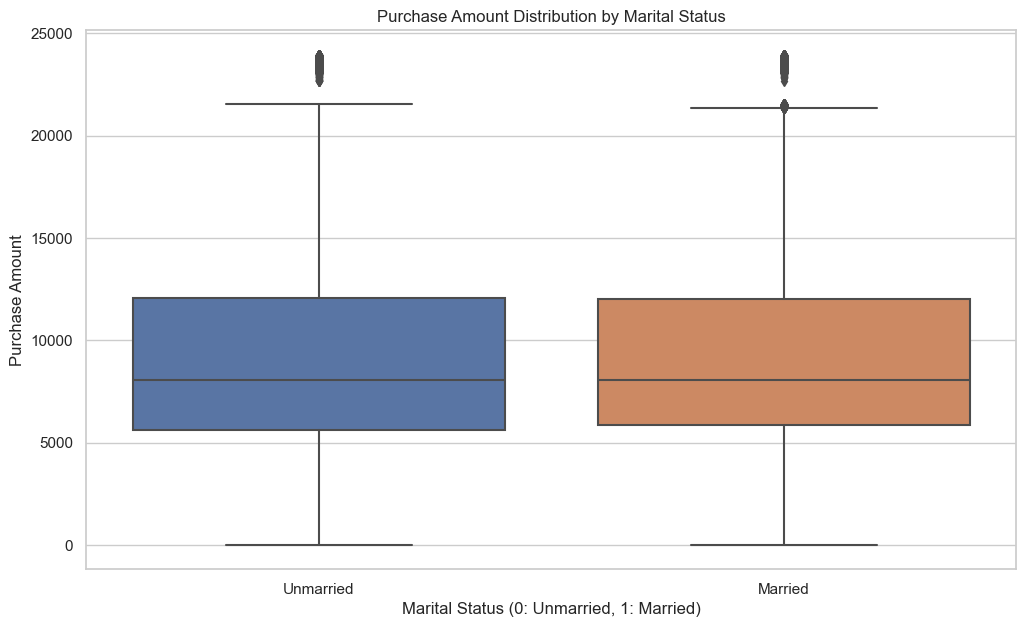

In [19]:
# Visualize purchase distribution by marital status using boxplots
plt.figure(figsize=(12, 7))
sns.boxplot(x='Marital_Status', y='Purchase', data=df)
plt.title('Purchase Amount Distribution by Marital Status')
plt.xlabel('Marital Status (0: Unmarried, 1: Married)')
plt.ylabel('Purchase Amount')
plt.xticks([0, 1], ['Unmarried', 'Married']) # Label ticks
plt.savefig('boxplot_purchase_by_marital_status.png', bbox_inches='tight') # Save the plot
plt.show()

**Observation:** The boxplots show very similar distributions for both married and unmarried customers. The medians, quartiles, and overall spread are nearly identical.

### 4.4 Central Limit Theorem (CLT) & Confidence Intervals for Marital Status

In [20]:
# Separate purchase data by marital status
unmarried_purchases = df[df['Marital_Status'] == 0]['Purchase']
married_purchases = df[df['Marital_Status'] == 1]['Purchase']

print(f"Number of unmarried transactions: {len(unmarried_purchases)}")
print(f"Number of married transactions: {len(married_purchases)}")

Number of unmarried transactions: 324731
Number of married transactions: 225337


In [21]:
# Calculate and print confidence intervals for different levels
results_marital = {'Marital Status': [], 'Confidence Level': [], 'Lower Bound': [], 'Upper Bound': [], 'Interval Width': []}

for conf in confidence_levels: # Using the same levels [0.90, 0.95, 0.99]
    # Unmarried CI (using original sample data)
    _, _, unmarried_ci = calculate_population_mean_ci(unmarried_purchases, conf)
    results_marital['Marital Status'].append('Unmarried')
    results_marital['Confidence Level'].append(f"{int(conf*100)}%")
    results_marital['Lower Bound'].append(unmarried_ci[0])
    results_marital['Upper Bound'].append(unmarried_ci[1])
    results_marital['Interval Width'].append(unmarried_ci[1] - unmarried_ci[0])
    
    # Married CI (using original sample data)
    _, _, married_ci = calculate_population_mean_ci(married_purchases, conf)
    results_marital['Marital Status'].append('Married')
    results_marital['Confidence Level'].append(f"{int(conf*100)}%")
    results_marital['Lower Bound'].append(married_ci[0])
    results_marital['Upper Bound'].append(married_ci[1])
    results_marital['Interval Width'].append(married_ci[1] - married_ci[0])

ci_marital_df = pd.DataFrame(results_marital)
print("\nConfidence Intervals for Population Mean Purchase Amount by Marital Status:")
print(ci_marital_df.round(2))


Confidence Intervals for Population Mean Purchase Amount by Marital Status:
  Marital Status Confidence Level  Lower Bound  Upper Bound  Interval Width
0      Unmarried              90%      9017.94      9525.41          507.46
1        Married              90%      9001.84      9563.01          561.17
2      Unmarried              95%      8981.93      9568.04          586.11
3        Married              95%      8932.53      9587.49          654.96
4      Unmarried              99%      8834.05      9689.07          855.02
5        Married              99%      8891.81      9630.99          739.18


**Answering Question:** *Results when the same activity is performed for Married vs Unmarried.*

**Conclusion on Overlap:** The confidence intervals for the average spending of married and unmarried customers **significantly overlap** at all common confidence levels (90%, 95%, 99%). The ranges are very close, and the difference in sample means (unmarried slightly higher) does not appear to be statistically significant when generalizing to the population.

**Leveraging the Conclusion:**
1.  **Unified Marketing:** Since spending habits are very similar regardless of marital status, Walmart does not necessarily need to create vastly different marketing campaigns or promotions based solely on this factor for Black Friday type events. Strategies can be broader, targeting both groups similarly.
2.  **Focus on Other Factors:** The lack of significant difference suggests that other factors (like gender, age, occupation, or product category preference) are likely stronger drivers of purchase amount differences than marital status alone. Walmart should focus its segmentation and targeting efforts on those more impactful variables.

### 4.5 Purchase Amount vs. Age

In [22]:
# Examine the unique values in the 'Age' column
print("Original Age Categories:")
print(df['Age'].unique())

Original Age Categories:
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


In [23]:
# Create the specified age bins
# Mapping original categories to new bins:
# '0-17'   -> '0-17'
# '18-25'  -> '18-25'
# '26-35'  -> '26-35'
# '36-45'  -> '36-50'
# '46-50'  -> '36-50'
# '51-55'  -> '51+'
# '55+'    -> '51+'

def map_age_group(age_str):
    if age_str == '0-17':
        return '0-17'
    elif age_str == '18-25':
        return '18-25'
    elif age_str == '26-35':
        return '26-35'
    elif age_str in ['36-45', '46-50']:
        return '36-50'
    elif age_str in ['51-55', '55+']:
        return '51+'
    else:
        return 'Unknown' # Should not happen with this data

df['Age_Group'] = df['Age'].apply(map_age_group)

# Verify the new groups
print("\nCreated Age Groups:")
print(df['Age_Group'].value_counts())


Created Age Groups:
Age_Group
26-35    219587
36-50    155714
18-25     99660
51+       60005
0-17      15102
Name: count, dtype: int64


In [24]:
# Calculate average purchase amount by age group
avg_purchase_age = df.groupby('Age_Group')['Purchase'].mean().sort_index()
print("\nAverage Purchase Amount by Age Group:")
print(avg_purchase_age)


Average Purchase Amount by Age Group:
Age_Group
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-50    9295.331743
51+      9463.661678
Name: Purchase, dtype: float64


**Observation:** The average purchase amount seems relatively consistent across the age groups from 18 to 50, with the 51+ group spending slightly more on average. The 0-17 group spends the least on average.

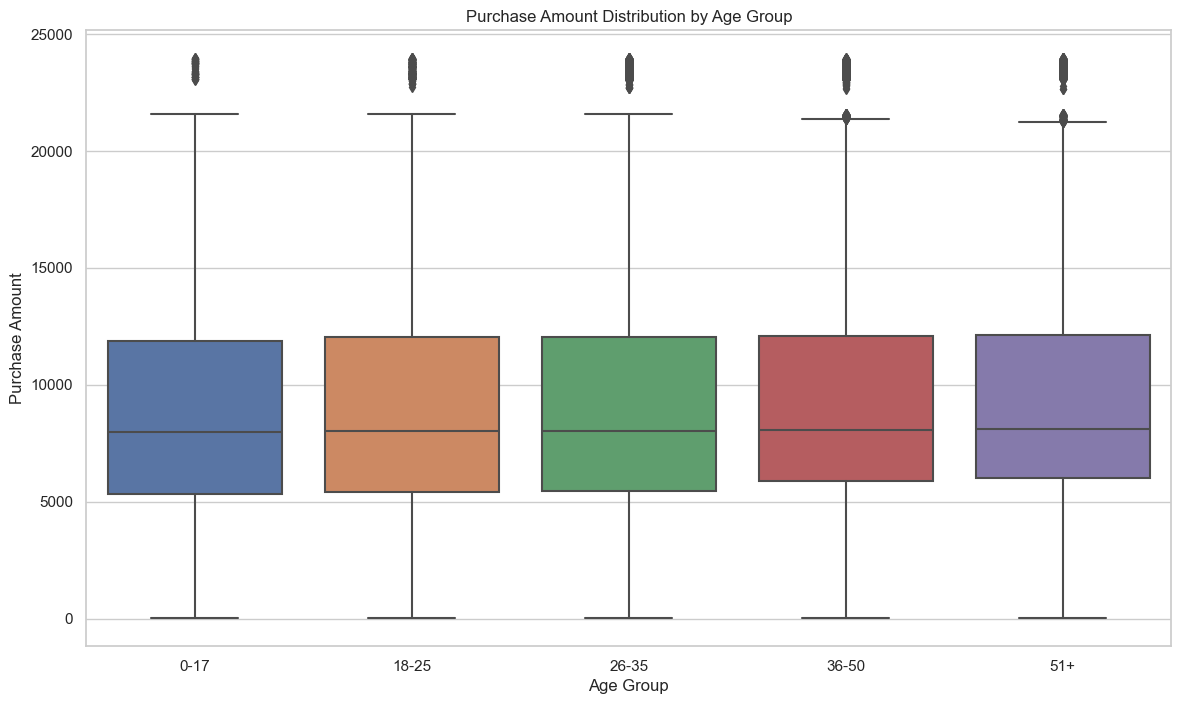

In [25]:
# Define the order for plotting
age_group_order = ['0-17', '18-25', '26-35', '36-50', '51+']

# Visualize purchase distribution by age group using boxplots
plt.figure(figsize=(14, 8))
sns.boxplot(x='Age_Group', y='Purchase', data=df, order=age_group_order)
plt.title('Purchase Amount Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.savefig('boxplot_purchase_by_age_group.png', bbox_inches='tight') # Save the plot
plt.show()

**Observation:** The boxplots confirm the trend seen in the averages. The distributions for the 18-25, 26-35, and 36-50 groups are very similar. The 51+ group shows a slightly higher median and overall distribution, while the 0-17 group is noticeably lower.

### 4.6 Central Limit Theorem (CLT) & Confidence Intervals for Age Group

In [26]:
# Calculate and print confidence intervals for different levels for each age group
results_age = {'Age Group': [], 'Confidence Level': [], 'Lower Bound': [], 'Upper Bound': [], 'Interval Width': []}

for age_grp in age_group_order:
    age_data = df[df['Age_Group'] == age_grp]['Purchase']
    if len(age_data) < 2: # Need at least 2 data points for std dev and CI
         print(f"Skipping {age_grp} due to insufficient data ({len(age_data)})")
         continue
         
    for conf in confidence_levels: # Using the same levels [0.90, 0.95, 0.99]
        # Age Group CI (using original sample data)
        _, _, age_ci = calculate_population_mean_ci(age_data, conf)
        results_age['Age Group'].append(age_grp)
        results_age['Confidence Level'].append(f"{int(conf*100)}%")
        results_age['Lower Bound'].append(age_ci[0])
        results_age['Upper Bound'].append(age_ci[1])
        results_age['Interval Width'].append(age_ci[1] - age_ci[0])

ci_age_df = pd.DataFrame(results_age)
print("\nConfidence Intervals for Population Mean Purchase Amount by Age Group:")
# Display sorted by age group and confidence level for better comparison
print(ci_age_df.sort_values(by=['Age Group', 'Confidence Level']).round(2))


Confidence Intervals for Population Mean Purchase Amount by Age Group:
   Age Group Confidence Level  Lower Bound  Upper Bound  Interval Width
0       0-17              90%      8654.14      9199.47          545.34
1       0-17              95%      8598.88      9263.05          664.17
2       0-17              99%      8541.72      9321.09          779.37
3      18-25              90%      8874.63      9405.16          530.53
4      18-25              95%      8838.52      9475.79          637.27
5      18-25              99%      8737.25      9609.87          872.62
6      26-35              90%      8986.35      9483.37          497.03
7      26-35              95%      8920.22      9579.92          659.71
8      26-35              99%      8831.05      9670.99          839.94
9      36-50              90%      9031.02      9614.05          583.03
10     36-50              95%      8979.34      9604.63          625.28
11     36-50              99%      8913.67      9646.37         

**Answering Question:** *Results when the same activity is performed for Age.*

**Conclusion on Overlap:**
*   **0-17 vs. Others:** The confidence interval for the 0-17 age group is distinctly lower and does not overlap with the intervals of the other age groups.
*   **18-25, 26-35, 36-50:** The confidence intervals for these three groups show significant overlap, suggesting that their average population spending is likely very similar. While the sample means might differ slightly, these differences are likely not statistically significant at the population level.
*   **51+ vs. Others:** The confidence interval for the 51+ group is slightly higher than the 18-50 groups. There might be some overlap, particularly with the 36-50 group at lower confidence levels, but the 51+ interval is generally shifted upwards, suggesting this group might genuinely spend slightly more on average than the middle age groups.

**Leveraging the Conclusion:**
1.  **Target Young Adults & Middle Age Broadly:** Marketing and promotions aimed at the 18-50 age range can likely be quite broad, as their spending habits per transaction are similar. Focus could be on shared interests or product categories popular within this large demographic.
2.  **Distinct Strategy for 0-17:** This group has significantly lower spending. Marketing should focus on lower-priced items, impulse buys, or potentially items influenced by parents. Their value might be more in long-term customer acquisition than high immediate transaction value.
3.  **Tailor Offers for 51+:** This group shows potential for slightly higher spending. Promotions could focus on higher-value items, comfort, quality, or specific categories popular with this demographic (e.g., health, home goods, potentially higher-end electronics). They might be less price-sensitive or have more disposable income.
4.  **Product Assortment:** Ensure product assortment caters to the distinct needs and price points relevant to the 0-17 group, the broad 18-50 group, and the slightly higher-spending 51+ group.

## 5. Final Insights

Based on the exploratory data analysis and the application of the Central Limit Theorem to estimate population averages:

1.  **Gender Spending Difference is Real:** Men consistently show a statistically significant higher average purchase amount per transaction compared to women during the Black Friday event. The confidence intervals for their average spending do not overlap, reinforcing this conclusion for the broader customer population.

2.  **Marital Status Not a Major Differentiator:** Average spending per transaction is very similar between married and unmarried customers. The confidence intervals heavily overlap, indicating no statistically significant difference in spending behavior based on marital status alone for the overall population.

3.  **Age Shows Clear Spending Tiers:**
    *   The **0-17** age group spends significantly less per transaction than all other groups.
    *   The **18-50** age range (covering '18-25', '26-35', '36-50') exhibits very similar spending patterns per transaction, with heavily overlapping confidence intervals. This large group can be considered relatively homogeneous in terms of average transaction value.
    *   The **51+** age group tends to spend slightly more per transaction on average than the 18-50 groups, with confidence intervals generally shifted higher, suggesting a potential, albeit smaller, difference in population spending.

4.  **Purchase Amount Distribution:** The overall purchase amount is right-skewed, meaning most transactions are for lower amounts, but a number of high-value transactions pull the average up. This pattern holds across different demographic groups.

## 6. Recommendations for Walmart

Based on the insights derived from the Black Friday transaction data, here are actionable recommendations for Walmart:

1.  **Develop Gender-Specific Marketing Angles:** 
    *   **For Men:** Since men spend more per transaction, target them with promotions emphasizing higher-value items, bundles, or categories they predominantly purchase (further analysis needed to identify these categories). Highlight deals on electronics, tools, or other big-ticket items potentially favored by this group.
    *   **For Women:** Explore *why* the average transaction is lower. Are they buying different types of items? Making more frequent, smaller purchases? Consider loyalty programs or promotions designed to increase basket size for product categories popular with women (e.g., apparel, home goods, beauty - requires further category analysis).

2.  **Simplify Marketing by Marital Status:** Do not invest heavily in segmenting core Black Friday promotions based on marital status, as spending behavior is very similar. Focus segmentation efforts on more impactful factors like gender and age.

3.  **Implement Age-Tiered Strategies:**
    *   **Engage the Youth (0-17):** Focus on affordable items, trending products popular with teens, and potentially promotions that appeal to parents buying for this age group. Consider this group for long-term customer relationship building.
    *   **Broad Appeal for Adults (18-50):** Utilize broad marketing campaigns for this large, relatively uniform spending group. Focus on popular Black Friday categories like electronics, toys, apparel, and home goods that appeal widely.
    *   **Target the Senior Segment (51+):** Since this group potentially spends slightly more, highlight quality, comfort, and potentially higher-value items. Consider promotions related to health & wellness, home improvement, or travel, if relevant product categories align.

4.  **Optimize Product Placement & Inventory:** Use the insights on gender and age spending to inform store layouts and online product placement during peak periods like Black Friday. Ensure sufficient stock levels for products likely to be popular with higher-spending segments (e.g., males, 51+).

5.  **Further Investigate High-Value Transactions:** Analyze the characteristics of the outlier purchases (high amounts) to understand what drives significant spending. Are specific products, customer segments, or locations involved? This could reveal opportunities for premium product strategies or targeted promotions.